In [1]:
# Ïã§ÏäµÏùÑ ÏßÑÌñâÌïòÍ∏∞ Ï†ÑÏóê Î≥∏ ÏΩîÎìúÎ•º Ïã§ÌñâÏãúÏºúÏÑú ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º ÏÑ§Ïπò
!pip install numpy==1.23.5
!pip install gym==0.25.2
!pip install matplotlib
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
from torchviz import make_dot

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
x11-utils is already the newest version (7.7+5build2).
xvfb is already the newest version (2:21.1.4-2ubuntu1.7~22.04.5).
0 upgraded, 0 newly installed, 0 to remove and 159 not upgraded.
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 159 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
freeglut3-dev is already the newest version (2.8.1-6).
0 upgraded, 0 newly installed, 0 to remove and 159 not upgraded.


<Display cmd_param=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '400x300x24', ':1001'] cmd=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '400x300x24', ':1001'] oserror=None return_code=None stdout="None" stderr="None" timeout_happened=False>

## Î™®Îìà Ìò∏Ï∂ú

In [ ]:
import gym
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.distributions import Categorical
import matplotlib.pyplot as plt
import numpy as np
from torchviz import make_dot

DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(DEVICE)

cuda:0


# A2C ÏïåÍ≥†Î¶¨Ï¶ò Íµ¨ÌòÑ


1.   Ï†ïÏ±Ö(Policy) Î∞è ÎπÑÌèâÍ∞Ä(Critic)ÎÑ§Ìä∏ÏõåÌÅ¨ Íµ¨ÌòÑ

1.   ÌôòÍ≤Ω ÍµêÎ•ò Î∞è Trajectory ÏàòÏßë
  - Rollout ÏÉòÌîå Ï†ÄÏû•

2.   Episode Î∞òÌôò Í∞í Í≥ÑÏÇ∞

2.   Advantage Í∞í Í≥ÑÏÇ∞

2.   Î™©Ï†Å Ìï®ÏàòÎ•º ÌôúÏö©Ìïú Ï†ïÏ±Ö ÏóÖÎç∞Ïù¥Ìä∏

1.   Íµ¨ÌòÑ Í≤∞Í≥º Î∂ÑÏÑù

  - CartPole ÌôòÍ≤ΩÏóêÏÑúÏùò ÏÑ±Îä• Í≤ÄÏ¶ù

  - REINFORCEÏôÄÏùò ÏÑ±Îä• ÎπÑÍµê




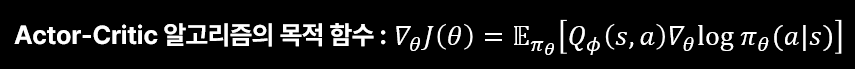

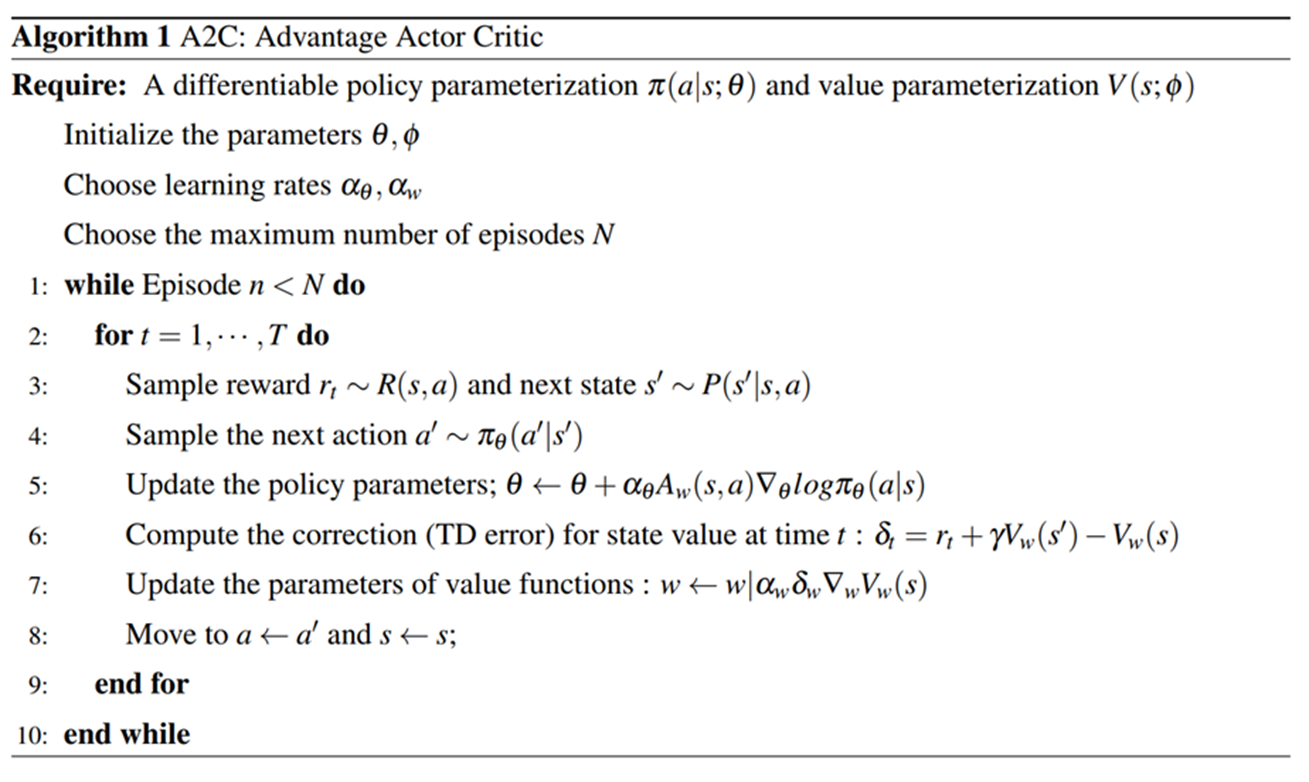

## Actor-Critic Î™®Îç∏ ÏÑ†Ïñ∏

Actor-Critic ÌÅ¥ÎûòÏä§Î•º ÌôúÏö©ÌïòÏó¨ ActorÏôÄ Critic ÎÑ§Ìä∏ÏõåÌÅ¨Î•º Ìè¨Ìï®ÌïòÍ≥† ÏûàÎäî `Actor_Critic` ÎÑ§Ìä∏ÏõåÌÅ¨ Íµ¨ÏÑ±

`Actor_Critic`ÌÅ¥ÎûòÏä§Îäî `nn.Module`ÏùÑ ÏÉÅÏÜçÎ∞õÏùåÏúºÎ°úÏç® Îã§ÏùåÍ≥º Í∞ôÏùÄ Ïó≠Ìï†ÏùÑ ÏàòÌñâÌï®

1.   `nn.Module`ÏùÑ ÌôúÏö©ÌïòÏó¨ ÎÑ§Ìä∏ÏõåÌÅ¨Ïùò Î™®Îì† ÌååÎùºÎØ∏ÌÑ∞(Í∞ÄÏ§ëÏπòÏôÄ Î∞îÏù¥Ïñ¥Ïä§)Î•º ÏûêÎèôÏúºÎ°ú Ï∂îÏ†Å
  - `nn.Parameter`Î•º ÌôúÏö©ÌïòÏó¨ ÎÑ§Ìä∏ÏõåÌÅ¨ Îß§Í∞úÎ≥ÄÏàòÎ•º ÌïúÎ≤àÏóê Í¥ÄÎ¶¨ Í∞ÄÎä•
2.   `forward` Î©îÏÜåÎìúÏùÑ ÌôúÏö©ÌïòÏó¨ ÎÑ§Ìä∏ÏõåÌÅ¨Ïùò ÏûÖÏ∂úÎ†•ÏùÑ Í¥ÄÎ¶¨

3.   PyTorchÎ•º ÌôúÏö©ÌïòÏó¨ ÎÑ§Ìä∏ÏõåÌÅ¨Î•º ÌÜµÌï¥ Ï†ÑÌååÎêòÎäî Î™®ÎìàÎì§Ïóê ÎåÄÌï¥ ÏûêÎèôÏ†ÅÏúºÎ°ú ÎØ∏Î∂ÑÏùÑ Í≥ÑÏÇ∞Ìï† Ïàò ÏûàÏùå


In [ ]:

################################## ÏΩîÎìú ÏûëÏÑ± ###################################

    # Actor_Critic classÎ•º ÏÑ†Ïñ∏ÌïòÍ≥†, nn.ModuleÏùÑ ÏÉÅÏÜçÎ∞õÏùå

    # ÌôòÍ≤ΩÏùò ÏÉÅÌÉú Î∞è ÌñâÎèô Ï∞®ÏõêÏùÑ Î≥ÄÏàòÎ°ú Ï†ÄÏû•

    # Actor Î∞è Critic ÎÑ§Ìä∏ÏõåÌÅ¨Î•º Î≥ÄÏàòÎ°ú ÏÑ†Ïñ∏
    #  - Actor : ÏÉÅÌÉúÎ•º ÏûÖÎ†•ÏúºÎ°ú, actionÏùò Í∞úÏàò(action dimension)ÎßåÌÅº Ï∂úÎ†•
    #  - Critic : ÏÉÅÌÉúÎ•º ÏûÖÎ†•ÏúºÎ°ú, ÌäπÏ†ï Í∞íÏùÑ Ï∂úÎ†•

    # `forward` Î©îÏÜåÎìúÎ•º ÌôúÏö©ÌïòÏó¨ policy_logitÍ≥º Í∞ÄÏπò ÏòàÏ∏° Í∞í Ï∂úÎ†•

################################################################################


Ìï®Ïàò `def __init__(self, obs_dim, act_dim)`Î•º ÌôúÏö©Ìïú Í∞ùÏ≤¥ Ï¥àÍ∏∞Ìôî
 - `self` : Í∞ùÏ≤¥ Ïä§Ïä§Î°úÎ•º Ï∞∏Ï°∞Ìï† Ïàò ÏûàÏùå. Í∞ùÏ≤¥ ÎÇ¥ Î™®Îì† Î≥ÄÏàòÏóê Ï†ëÍ∑º Í∞ÄÎä•
 (ÏïÑÎ¨¥Í≤ÉÎèÑ ÏûÖÎ†•ÌïòÏßÄ ÏïäÏïÑÎèÑ defaultÎ°ú Ï∂îÍ∞ÄÎê®)
 - `obs_dim` : ÎÑ§Ìä∏ÏõåÌÅ¨ Íµ¨ÏÑ±ÏùÑ ÏúÑÌïú Í¥ÄÏ∏° Ï∞®Ïõê ÏûÖÎ†•
 - `act_dim` : ÎÑ§Ìä∏ÏõåÌÅ¨ Íµ¨ÏÑ±ÏùÑ ÏúÑÌïú ÌñâÎèô Ï∞®Ïõê ÏûÖÎ†•

In [ ]:
env_name = 'CartPole-v1'
env = gym.make(env_name)
obs_dim = env.observation_space.shape[0]
n_action = env.action_space.n

actor_critic = Actor_Critic(
    obs_dim = obs_dim,
    act_dim = n_action
    ).to(DEVICE)

/home/elicer/.local/lib/python3.10/site-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/elicer/.local/lib/python3.10/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


Class ÎÇ¥ ÏÑ†Ïñ∏Îêú Î≥ÄÏàòÎì§ÏùÄ `.`ÏùÑ ÌôúÏö©ÌïòÏó¨ Ìò∏Ï∂ú Í∞ÄÎä•

In [ ]:
print("State dimension:", actor_critic.obs_dim)
print("Action dimension:", actor_critic.act_dim)
print("Value Network:", actor_critic.value_net)
print("Policy Network:", actor_critic.policy_net)

State dimension: 4
Action dimension: 2
Value Network: Sequential(
  (0): Linear(in_features=4, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=1, bias=True)
)
Policy Network: Sequential(
  (0): Linear(in_features=4, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=2, bias=True)
)


`Actor_Critic` ÌÅ¥ÎûòÏä§Ïùò ÌååÎùºÎØ∏ÌÑ∞ ÌôïÏù∏

In [ ]:
print(actor_critic.parameters)

<bound method Module.parameters of Actor_Critic(
  (policy_net): Sequential(
    (0): Linear(in_features=4, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=2, bias=True)
  )
  (value_net): Sequential(
    (0): Linear(in_features=4, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=1, bias=True)
  )
)>


ÎÑ§Ìä∏ÏõåÌÅ¨ forward ÏàòÌñâÎ•º ÏàòÌñâÌï®ÏúºÎ°úÏç® ÏûêÎèôÏ†ÅÏúºÎ°ú ÎØ∏Î∂Ñ Ïó∞ÏÇ∞ ÏàòÌñâ
 - Ïó≠Ï†ÑÌåå(backpropagation) Í≥ºÏ†ïÏóêÏÑú `grad_fn`Ïóê Îî∞Îùº ÎØ∏Î∂ÑÏù¥ ÏàòÌñâÎê®

 - `policy_logit`Í≥º `value`Îäî `actor_critic` Î™®Îç∏Ïùò `forward` Î©îÏÜåÎìúÎ•º ÌÜµÌï¥ Í≥ÑÏÇ∞ÎêòÎ©∞, Î©îÏÜåÎìú ÎÇ¥ ÎÑ§Ìä∏ÏõåÌÅ¨Î•º ÌÜµÍ≥ºÌïòÎ©∞ Ïó∞ÏÇ∞Îêú Ï†ïÎ≥¥Î•º `grad_fn`ÏùÑ ÌÜµÌï¥ Í∞±Ïã†
 - ÎÑ§Ìä∏ÏõåÌÅ¨ÏóêÏÑú Ï†ÑÌååÎêú ÎØ∏Î∂ÑÍ∞íÎì§ÏùÄ Í∑∏ÎûòÌîÑ ÌòïÏãùÏùÑ ÌôúÏö©ÌïòÏó¨ ÏßÄÏÜçÏ†ÅÏúºÎ°ú Ïó∞Í≤∞Îê®

In [ ]:
random_observation = torch.randn(1, 4)

# forward Î©îÏÜåÎìú Ìò∏Ï∂ú

l1 = nn.Linear(4, 2)
l2 = nn.ReLU()
l3 = nn.Linear(2, 1)

print("Random Observation:", random_observation)
l1_output = l1(random_observation)
print("Linear:", l1_output)
l2_output = l2(l1_output)
print("ReLU:", l2_output)
l3_output = l3(l2_output)
print("Linear:", l3_output)

Random Observation: tensor([[-0.3225,  0.9189,  0.1572, -0.1445]])
Linear: tensor([[0.2274, 0.9064]], grad_fn=<AddmmBackward0>)
ReLU: tensor([[0.2274, 0.9064]], grad_fn=<ReluBackward0>)
Linear: tensor([[1.0812]], grad_fn=<AddmmBackward0>)


In [ ]:
model = nn.Sequential()
model.add_module('W0', nn.Linear(4, 2))
model.add_module('relu', nn.ReLU())
model.add_module('W1', nn.Linear(16, 1))

# Ïó∞ÏÇ∞ Í∑∏ÎûòÌîÑ ÏãúÍ∞ÅÌôî
make_dot(l3_output, params=dict(list(l1.named_parameters()) + list(l3.named_parameters())))

`detach()` Î©îÏÜåÎìúÎ•º ÌôúÏö©ÌïòÏó¨ `grad_fn` Î∂ÑÎ¶¨
  - ÏµúÏ†ÅÌôî Í≥ºÏ†ïÏóêÏÑú ÎØ∏Î∂Ñ Ïó∞ÏÇ∞Ïóê Í¥ÄÏó¨ÌïòÍ≥† Ïã∂ÏßÄ ÏïäÏùÄ Î≥ÄÏàòÏóê ÎåÄÌïòÏó¨, `grad_fn`ÏùÑ Î∂ÑÎ¶¨
  - `grad_fn`Ïù¥ Î∂ÑÎ¶¨Îêú Î≥ÄÏàòÎäî ÏµúÏ†ÅÌôî Í≥ºÏ†ïÏóêÏÑú ÏÉÅÏàòÏùò Ïó≠Ìï†ÏùÑ ÏàòÌñâ

In [ ]:
l1_output = l1_output.detach()
l2_output = l2_output.detach()
l3_output = l3_output.detach()

print("l1_output:", l1_output)
print("l2_output:", l2_output)
print("l3_output:", l3_output)

l1_output: tensor([[0.2274, 0.9064]])
l2_output: tensor([[0.2274, 0.9064]])
l3_output: tensor([[1.0812]])


## ÏÉÅÌÉúÏóê Îî∞Îùº ÌñâÎèô ÏÑ†ÌÉù

In [ ]:
done = False
obs = env.reset()

actions, states, rewards = [], [], []

total_rewards = 0
step = 0
# ÏóêÌîºÏÜåÎìúÍ∞Ä ÎÅùÎÇ† ÎïåÍπåÏßÄ Î∞òÎ≥µ
while not done:
    # ÌôòÍ≤ΩÏóêÏÑú Î¨¥ÏûëÏúÑ ÌñâÎèô ÏÉòÌîåÎßÅ
    action = env.action_space.sample()
    next_obs, reward, done, _ = env.step(action)
    print("State :")
    print(obs)
    print("Action :")
    print(action)
    print("Next State :")
    print(next_obs)
    print("Reward :")
    print(reward)
    print("Done :")
    print(done)

    ############   For render  #############
    plt.imshow(env.render()[0])
    plt.title(f'Time step: {step}')
    plt.imshow()
    ########################################

    # Trajectory ÏÉòÌîå Ï†ÄÏû•
    action = torch.tensor(action, dtype=torch.int).to(DEVICE)
    actions.append(action)
    states.append(obs)
    rewards.append(reward)
    total_rewards += reward

    # Îã§Ïùå ÏÉÅÌÉúÎ°ú Ïù¥Îèô
    next_obs =  torch.tensor(next_obs, dtype=torch.float).to(DEVICE)
    obs = next_obs
    step += 1

print("Total rewards : %d"%total_rewards)

## Ï†ïÏ±Ö ÎÑ§Ìä∏ÏõåÌÅ¨Î•º ÌôúÏö©Ìïú ÌñâÎèô ÏÑ†ÌÉù (Remind)

`torch.distributions.Categorical`

: Î≤îÏ£ºÌòï Î∂ÑÌè¨Î•º ÎÇòÌÉÄÎÇ¥Î©∞, Í∞ÅÍ∞ÅÏùò Ïπ¥ÌÖåÍ≥†Î¶¨(ÎòêÎäî ÌÅ¥ÎûòÏä§)Ïóê ÎåÄÌïú ÌôïÎ•†Ïóê Îî∞Îùº ÏÉòÌîåÎßÅ ÏûëÏóÖÏùÑ ÏàòÌñâ

In [ ]:
import torch
from torch.distributions import Categorical

# ÌôïÎ•† Î≤°ÌÑ∞
probs = torch.tensor([0.2, 0.3, 0.5])  # 3Í∞úÏùò Ïπ¥ÌÖåÍ≥†Î¶¨Ïóê ÎåÄÌïú ÌôïÎ•†

# Categorical Î∂ÑÌè¨ Í∞ùÏ≤¥ ÏÉùÏÑ±
dist = Categorical(probs)

# ÌôïÎ•†Ïóê Îî∞Îùº ÏÉòÌîåÎßÅ ÏàòÌñâ
sample = dist.sample()

print("ÌôïÎ•† : ", end='')
print(probs)
print("ÌôïÎ•†Î∂ÑÌè¨ : ", end='')
print(dist)
print("ÏÉòÌîå Ï∂úÎ†• : ", end='')
print(sample)

ÌôïÎ•† : tensor([0.2000, 0.3000, 0.5000])
ÌôïÎ•†Î∂ÑÌè¨ : Categorical(probs: torch.Size([3]))
ÏÉòÌîå Ï∂úÎ†• : tensor(2)


In [ ]:
# Î¨¥ÏûëÏúÑ ÏÉòÌîåÏùÑ 100Î≤à Ïã§Ìñâ
samples = []
for _ in range(100):
    samples.append(dist.sample().item())

# Í∞Å Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ ÎπàÎèÑÏàò Í≥ÑÏÇ∞
frequencies = [0, 0, 0]
for sample in samples:
    frequencies[sample] += 1

print("ÏÉòÌîå Î∞úÏÉù ÎπàÎèÑÏàò : ", end='')
print(frequencies)

sampled_prob = []
for freq in frequencies:
    sampled_prob.append(freq / 100.0)

print("Î∞úÏÉùÌïú ÏÉòÌîåÏùò ÌôïÎ•† : ", end='')
print(sampled_prob)

ÏÉòÌîå Î∞úÏÉù ÎπàÎèÑÏàò : [16, 27, 57]
Î∞úÏÉùÌïú ÏÉòÌîåÏùò ÌôïÎ•† : [0.16, 0.27, 0.57]


### Î≤îÏ£ºÌòï Î∂ÑÌè¨Î•º ÌôúÏö©Ìïú ÌñâÎèô ÏÑ†ÌÉù

1) Ï†ïÏ±Ö ÎÑ§Ìä∏ÏõåÌÅ¨Î•º ÌôúÏö©ÌïòÏó¨ ÌñâÎèô ÌôïÎ•† Í≤∞Ï†ï


2) ÏòàÏ∏°Îêú ÌñâÎèô ÌôïÎ•†Ïóê Îî∞Îùº ÌñâÎèô ÏÑ†ÌÉù

In [ ]:
obs = torch.tensor(env.reset(), dtype=torch.float).to(DEVICE)

logits = actor_critic.policy_net(obs)
probs = F.softmax(logits, dim=-1)
dist = torch.distributions.Categorical(probs=probs)
action = dist.sample().item()

print("State : ", end='')
print(obs)
print("Logit : ", end='')
print(logits)
print("Probability : ", end='')
print(probs)
print("Distribution : ", end='')
print(dist)
print("Action : ", end='')
print(action)

State : tensor([-0.0342,  0.0217,  0.0132,  0.0410], device='cuda:0')
Probability : tensor([0.1408, 0.3486], device='cuda:0', grad_fn=<ViewBackward0>)
Distribution : Categorical(probs: torch.Size([2]))
Action : 1


ÌñâÎèô ÏÑ†ÌÉù Í≥ºÏ†ïÏùÑ Ìï®ÏàòÌôî(`action_decide`)
 - ÏûÖÎ†•Î≥ÄÏàò : Ï†ïÏ±Ö ÎÑ§Ìä∏ÏõåÌÅ¨, Í¥ÄÏ∏°(ÏÉÅÌÉú) Îç∞Ïù¥ÌÑ∞(`obs`)
 - Ï∂úÎ†• Í∞í : ÏÉòÌîåÎßÅÎêú ÌñâÎèô(`action`)
 - Ïó≠Ìï† : ÏûÖÎ†• Î∞õÏùÄ Í¥ÄÏ∏° Îç∞Ïù¥ÌÑ∞Î•º Î∞îÌÉïÏúºÎ°ú ÎÑ§Ìä∏ÏõåÌÅ¨Î•º ÌôúÏö©Ìï¥ Í∞ÄÏπòÎ•º ÌåêÎã®ÌïòÍ≥†, ÌôïÎ•† Î∂ÑÌè¨Ïóê Îî∞Îùº ÌñâÎèô ÏÑ†ÌÉù

In [ ]:
def action_decide(network, obs):
    obs = torch.tensor([obs], dtype=torch.float).to(DEVICE)

    ################################## ÏΩîÎìú ÏûëÏÑ± ###################################

    # ÏÉÅÌÉúÏóê Îî∞Îùº Ï†ïÏ±ÖÏùò logit ÏòàÏ∏°

    # logitÏùò Í∞íÏóê Îî∞Îùº ÌñâÎèô ÏÑ†ÌÉù ÌôïÎ•† Í≥ÑÏÇ∞

    # ÌôïÎ•† Î∂ÑÌè¨ Íµ¨ÏÑ±

    # ÌôïÎ•†Ïóê Îî∞Îùº ÌñâÎèô ÏÑ†ÌÉù

    ################################################################################

    return action

## 3. Episode ÏÉòÌîåÏùÑ ÌôúÏö©Ìïú Î∞òÌôò Í∞í Í≥ÑÏÇ∞

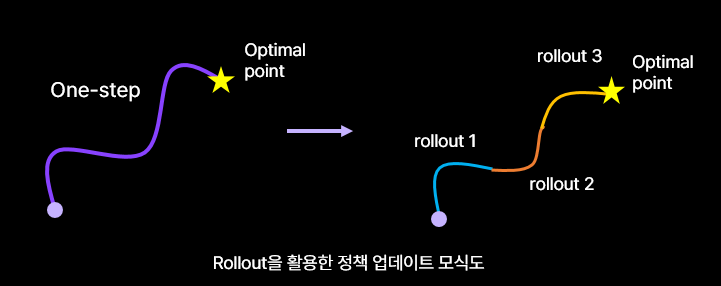

ÏóêÌîºÏÜåÎìú ÎÇ¥ Îç∞Ïù¥ÌÑ∞ ÏùºÎ∂ÄÎ•º ÌôúÏö©Ìïú Î∞òÌôò Í∞í Í≥ÑÏÇ∞
 - Í∏∞Ï°¥ REINFORCE ÏïåÍ≥†Î¶¨Ï¶òÏùÄ ÏóêÌîºÏÜåÎìú ÎÇ¥ Î™®Îì† Îç∞Ïù¥ÌÑ∞Î•º ÌôúÏö©ÌïòÏó¨ Î∞òÌôò Í∞í Í≥ÑÏÇ∞
 - A2C ÏïåÍ≥†Î¶¨Ï¶òÏùÄ ÏóêÌîºÏÜåÎìú ÎÇ¥ N-step Îç∞Ïù¥ÌÑ∞Î•º ÌôúÏö©ÌïòÍ∏∞ ÎñÑÎ¨∏Ïóê ÎßàÏßÄÎßâ ÏÉÅÌÉú Ïù¥ÌõÑÏùò Í∞ÄÏπòÏóê ÎåÄÌï¥ ÏòàÏ∏°Ïù¥ ÌïÑÏöîÌï®

In [ ]:
max_time_step = 5
gamma = 0.99

time_step = 1
done = False
obs = env.reset()
total_reward = 0

current_state = []
current_action = []
next_states = []
rewards = []
returns = []

while not done:

    ################################## ÏΩîÎìú ÏûëÏÑ± ###################################

    # action_decideÌï®ÏàòÎ•º ÌôúÏö©Ìïú ÌñâÎèô Í≤∞Ï†ï Î∞è ÌôòÍ≤ΩÍ≥º ÍµêÎ•ò

    # Í∞Å ÏÉÅÌÉú, ÌñâÎèô, Î≥¥ÏÉÅ Î∞∞Ïó¥Ïóê rollout ÏÉòÌîå Ï†ÄÏû•

    ################################################################################

    if time_step % max_time_step == 0 or done:
        states = torch.tensor(current_state, dtype=torch.float).to(DEVICE)
        actions = torch.tensor(current_action, dtype=torch.int64).to(DEVICE)
        next_states = torch.tensor(next_states, dtype=torch.float).to(DEVICE)


        ################################## ÏΩîÎìú ÏûëÏÑ± ###################################

        # ÌòÑÏû¨ TrajectoryÏùò ÎßàÏßÄÎßâ ÏÉÅÌÉúÏóê ÎåÄÌïú Í∞í ÏòàÏ∏°, ÏóêÌîºÏÜåÎìúÍ∞Ä ÎÅùÎÇ¨Îã§Î©¥ Îã§Ïùå ÏÉÅÌÉúÏùò Î∞òÌôò Í∞íÏùÑ Ï†ÑÌååÌïòÏßÄ ÏïäÏùå

        # rewardsÏùò Ïó≠ÏàúÎ∂ÄÌÑ∞ Î∞òÌôò Í∞í Í≥ÑÏÇ∞

        # RolloutÏù¥ ÎÅùÎÇ¨ÏùÑ Í≤ΩÏö∞, ÏÉòÌîåÎì§ÏùÑ Ï¥àÍ∏∞Ìôî

        ################################################################################

    time_step += 1
    obs = next_obs

/tmp/ipykernel_129/257243013.py:2: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:261.)
  obs = torch.tensor([obs], dtype=torch.float).to(DEVICE)


Total time step : 37


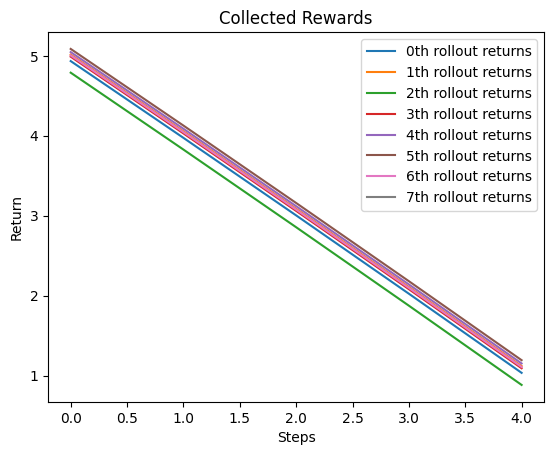

In [ ]:
print("Total time step : %d"%time_step)
for i, rollout_return in enumerate(returns):
  plt.title("Collected Rewards")
  plt.xlabel("Steps")
  plt.ylabel("Return")
  plt.plot(torch.Tensor(rollout_return).cpu().detach().numpy(), label=f'{i}th rollout returns')
  plt.legend()
plt.show()
plt.close()

Î∞òÌôò Í∞í Í≥ÑÏÇ∞ Í≥ºÏ†ï Ìï®ÏàòÌôî(`get_returns`)
 - ÏûÖÎ†•Î≥ÄÏàò : Ï†ïÏ±Ö ÎÑ§Ìä∏ÏõåÌÅ¨, RolloutÎêú Îã§Ïùå ÏÉÅÌÉúÏùò Í¥ÄÏ∏° Îç∞Ïù¥ÌÑ∞(`next_states`), RolloutÎêú Î≥¥ÏÉÅÍ∞í(`rewards`), Terminal Ïó¨Î∂Ä(`done`)
 - Ï∂úÎ†• Í∞í : Rollout Îç∞Ïù¥ÌÑ∞Îì§Ïùò Î∞òÌôò Í∞í
 - Ïó≠Ìï† : RolloutÎêú Îç∞Ïù¥ÌÑ∞Îì§ÏùÑ ÏûÖÎ†•Î∞õÏïÑ Í∞ÅÍ∞ÅÏùò Î∞òÌôò Í∞íÏùÑ ÏòàÏ∏°. ÏóêÌîºÏÜåÎìúÍ∞Ä ÎÅùÎÇòÍ∏∞ Ï†ÑÏóê Î∞òÌôò Í∞íÏùÑ ÏòàÏ∏°Ìï¥ÏïºÌï®ÏúºÎ°ú, ÎßàÏßÄÎßâ Îã§Ïùå ÏÉÅÌÉúÎì§ ÌôúÏö©ÌïòÏó¨ Ïù¥ÌõÑÏùò Í∞ÄÏπòÎ•º ÏòàÏ∏°ÌïòÏó¨ Î∞òÌôò Í∞í ÏòàÏ∏°Ïóê ÌôúÏö©

In [ ]:
# Ï†ïÏ±ÖÏùò Î∞òÌôò Í∞í Í≥ÑÏÇ∞ Ìï®ÏàòÌôî
def get_returns(net, next_states, rewards, done, gamma=0.99):

    ################################## ÏΩîÎìú ÏûëÏÑ± ###################################

    # ÌòÑÏû¨ TrajectoryÏùò ÎßàÏßÄÎßâ ÏÉÅÌÉúÏóê ÎåÄÌïú Í∞í ÏòàÏ∏°, ÏóêÌîºÏÜåÎìúÍ∞Ä ÎÅùÎÇ¨Îã§Î©¥ Îã§Ïùå ÏÉÅÌÉúÏùò Î∞òÌôò Í∞íÏùÑ Ï†ÑÌååÌïòÏßÄ ÏïäÏùå

    # rewardsÏùò Ïó≠ÏàúÎ∂ÄÌÑ∞ Î∞òÌôò Í∞í Í≥ÑÏÇ∞

    ################################################################################

    return batch_return

## Î™©Ï†Å Ìï®ÏàòÎ•º ÌôúÏö©Ìïú Ï†ïÏ±Ö ÏóÖÎç∞Ïù¥Ìä∏



A2CÏùò Î™©Ï†Å Ìï®Ïàò $J(\theta)$Ïóê ÎåÄÌïú Ï†ïÏ±Ö Í≤ΩÏÇ¨ :

$\hat{\nabla}_{\theta} J(\theta) = \nabla_{\theta} \log \pi_{\theta}(s_t, a_t) A_t$

, where $ùê¥_ùë°^{(ùëõ)} (ùë†,ùëé) = \sum\limits_{l=0}^{n-1} \gamma^l ùëü(ùë†_{t+l}, a_{t+l}) + \gamma^{n}V(ùë†_{t+n}) - V(ùë†_t)$


- Advantage Í∞íÏóê Îî∞Îùº ÌñâÎèôÏùò Í≤∞Ï†ï ÌôïÎ•† ÏµúÎåÄÌôî
- ÏóêÏù¥Ï†ÑÌä∏Ïùò ÌñâÎèôÏù¥ Ï¢ãÏùÄ Í≤∞Í≥º(ÎÜíÏùÄ Advantage)Î•º Í∞ÄÏ†∏Ïò§Î©¥ Í∑∏ ÌñâÎèôÏùÑ Îçî ÏûêÏ£º Ï∑®ÌïòÎèÑÎ°ù Ï†ïÏ±ÖÏùÑ Ï°∞Ï†ï

1) Advantage Í∞í Í≥ÑÏÇ∞


In [ ]:
_, state_value = actor_critic.forward(states)
last_rollout_returns = torch.Tensor(returns[-1]).unsqueeze(1).to(DEVICE)

################################## ÏΩîÎìú ÏûëÏÑ± ###################################

# ÏòàÏ∏°Îêú ÏÉÅÌÉú ÏòàÏ∏°Í∞íÏùÑ ÌôúÏö©Ìï¥ Advantage Í∞í Í≥ÑÏÇ∞

################################################################################
print(advantage)

tensor([[0.8909]], device='cuda:0', grad_fn=<SubBackward0>)


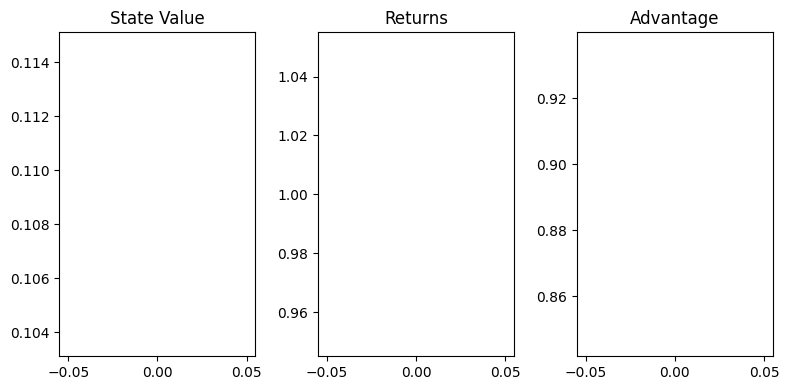

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(8, 4))

state_value = state_value.cpu().detach()
last_rollout_returns = last_rollout_returns.cpu().detach()
advantage = advantage.cpu().detach()

# Í∞Å subplotÏóê Îç∞Ïù¥ÌÑ∞ Í∑∏Î¶¨Í∏∞
axs[0].plot(np.array(state_value))
axs[0].set_title('State Value')

axs[1].plot(np.array(last_rollout_returns))
axs[1].set_title('Returns')

axs[2].plot(np.array(advantage))
axs[2].set_title('Advantage')


# Í∑∏ÎûòÌîÑ ÌëúÏãú
plt.tight_layout()
plt.show()

2) Advantage Í∞íÏùÑ ÌôúÏö©Ìïú Î™©Ï†ÅÌï®Ïàò ÏµúÏ†ÅÌôî

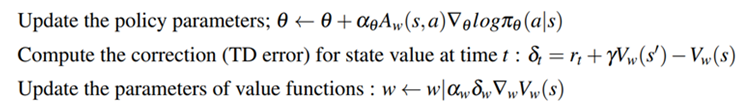

Îã®, Ïù¥ Îïå td error($\delta_{t})$ ÎåÄÏã† $ùê¥_ùë°^{(ùëõ)} (ùë†,ùëé) = \sum\limits_{l=0}^{n-1} \gamma^l ùëü(ùë†_{t+l}, a_{t+l}) + \gamma^{n}V(ùë†_{t+n}) - V(ùë†_t)$ ÏÇ¨Ïö©

`gather`Ìï®ÏàòÎäî log_probÎì§ Ï§ë ÏÑ†ÌÉùÎêú actionÏóê ÎåÄÌïú log_probÎßå ÏÑ†ÌÉù


In [ ]:
ex_log_prob = torch.tensor(
    [[-1.2, -0.8, -1.0],
     [-1.1, -0.9, -0.7],
     [-1.4, -0.6, -1.2]])
ex_actions = torch.tensor([0, 2, 1]).unsqueeze(1)

gather_log_prob = ex_log_prob.gather(1, ex_actions)
print(gather_log_prob)

tensor([[-1.2000],
        [-0.7000],
        [-0.6000]])


In [ ]:
################################## ÏΩîÎìú ÏûëÏÑ± ###################################

# ÎÑ§Ìä∏ÏõåÌÅ¨Î•º ÌôúÏö©Ìïú ÏÉÅÌÉú logit ÏòàÏ∏°

# logitÏùÑ ÌôúÏö©ÌïòÏó¨ log probability Í≥ÑÏÇ∞

# gatherÌï®ÏàòÎ•º ÌôúÏö©ÌïòÏó¨ ÌòÑÏû¨ actionÏóê ÎåÄÌïú log_prob ÌöçÎìù

################################################################################

In [ ]:
advantage = torch.Tensor(advantage).unsqueeze(1).to(DEVICE)

################################## ÏΩîÎìú ÏûëÏÑ± ###################################

# ActorÍ∞Ä Advantage Í∞íÏùÑ ÏµúÎåÄÌôîÌïòÎèÑÎ°ù ÌïôÏäµ, Ïò§Ï∞® Ìï®Ïàò Î™Ö : 'loss_policy'

# CriticÏù¥ Advantage Í∞íÏùÑ ÏòàÏ∏°ÌïòÎèÑÎ°ù ÌïôÏäµ, Ïò§Ï∞® Ìï®Ïàò Î™Ö : 'loss_critic'

################################################################################

loss = loss_policy + loss_critic

print(f'loss_policy : {loss_policy}')
print(f'loss_critic : {loss_critic}')
print(f'loss : {loss}')

loss_policy : 0.7080579400062561
loss_critic : 0.39684510231018066
loss : 1.104902982711792


ÎÑ§Ìä∏ÏõåÌÅ¨ ÏóÖÎç∞Ïù¥Ìä∏ Ìï®ÏàòÌôî(`a2c_update`)
 - ÏûÖÎ†•Î≥ÄÏàò : Ï†ïÏ±Ö ÎÑ§Ìä∏ÏõåÌÅ¨, RolloutÎêú Îç∞Ïù¥ÌÑ∞Îì§
 - Ï∂úÎ†• Í∞í : Í≥ÑÏÇ∞Îêú loss Í∞í
 - Ïó≠Ìï† : RolloutÎêú Îç∞Ïù¥ÌÑ∞Îì§ÏùÑ return Î∞è advantage Í∞íÏùÑ Í≥ÑÏÇ∞ÌïòÍ≥†, Í∞ÅÍ∞ÅÏùò Î™©Ï†ÅÌï®ÏàòÏóê ÎßûÎäî Ïò§Ï∞®Ìï®Ïàò Í≥ÑÏÇ∞

In [ ]:
def a2c_update(net, done, current_state, current_action, next_states, rewards):

    ################################## ÏΩîÎìú ÏûëÏÑ± ###################################

    # Trajectory Îã®ÏúÑÏùò Îç∞Ïù¥ÌÑ∞ Íµ¨ÏÑ±

    # Î∞òÌôò Í∞í Í≥ÑÏÇ∞

    # ÌòÑÏû¨ ÏÉÅÌÉúÏóê Îî∞Îùº ÌñâÎèô ÏÑ†ÌÉù

    # Advantage Ìï®Ïàò Í≥ÑÏÇ∞

    # Actor ÌñâÎèôÏùò Advantage ÏµúÎåÄÌôî

    # CriticÏù¥ advantageÌï®ÏàòÎ•º ÏòàÏ∏°ÌïòÎèÑÎ°ù ÌïôÏäµ

    ################################################################################

    loss = loss_policy + loss_critic

    return loss

## Ï†ÑÏ≤¥ ÌïôÏäµ ÏΩîÎìú

In [ ]:
env_name = 'CartPole-v1'

env = gym.make(env_name)
obs_dim = env.observation_space.shape[0]
n_action = env.action_space.n

lr = 1e-3
gamma = 0.99
max_epi_num = 1000

actor_critic = Actor_Critic(obs_dim, n_action).to(DEVICE)
optimizer = optim.Adam(actor_critic.parameters(), lr=lr)

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [ ]:
env_name = 'CartPole-v1'

env = gym.make(env_name)
obs_dim = env.observation_space.shape[0]
n_action = env.action_space.n

lr = 1e-3
gamma = 0.99

actor_critic = Actor_Critic(obs_dim, n_action).to(DEVICE)
optimizer = optim.Adam(actor_critic.parameters(), lr=lr)

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [ ]:
# ÏµúÎåÄ Episode ÌöüÏàò Í≤∞Ï†ï
max_epi_num = 1000
# Episode ÎÇ¥ ÏµúÎåÄ timestep ÌöüÏàò Í≤∞Ï†ï
max_time_step = 10
time_step = 1

# ÏóêÌîºÏÜåÎìú ÎèôÏïà ÌöçÎìùÌïú reward Í∞í ÎπÑÍµê
a2c_results_reward = []
advantages = []
actor_losses = []
critic_losses = []
total_losses = []

for i in range(max_epi_num):

    done = False
    obs = env.reset()
    total_reward = 0

    current_state = []
    current_action = []
    next_states = []
    rewards = []


    while not done:
        ################################## ÏΩîÎìú ÏûëÏÑ± ###################################

        # action_decideÌï®ÏàòÎ•º ÌôúÏö©Ìïú ÌñâÎèô Í≤∞Ï†ï Î∞è ÌôòÍ≤ΩÍ≥º ÍµêÎ•ò

        # Í∞Å ÏÉÅÌÉú, ÌñâÎèô, Î≥¥ÏÉÅ Î∞∞Ïó¥Ïóê rollout ÏÉòÌîå Ï†ÄÏû•

        ################################################################################

        if time_step % max_time_step == 0 or done:
            # Trajectory Îã®ÏúÑÏùò Îç∞Ïù¥ÌÑ∞ Íµ¨ÏÑ±
            states = torch.tensor(current_state, dtype=torch.float).to(DEVICE)
            actions = torch.tensor(current_action, dtype=torch.int64).to(DEVICE)
            next_states = torch.tensor(next_states, dtype=torch.float).to(DEVICE)

            ################################## ÏΩîÎìú ÏûëÏÑ± ###################################

            # Î∞òÌôò Í∞í Í≥ÑÏÇ∞

            # ÌòÑÏû¨ TrajectoryÏùò ÎßàÏßÄÎßâ ÏÉÅÌÉúÏóê ÎåÄÌïú Í∞í ÏòàÏ∏°, ÏóêÌîºÏÜåÎìúÍ∞Ä ÎÅùÎÇ¨Îã§Î©¥ Îã§Ïùå ÏÉÅÌÉúÏùò Î∞òÌôò Í∞íÏùÑ Ï†ÑÌååÌïòÏßÄ ÏïäÏùå

            # rewardsÏùò Ïó≠ÏàúÎ∂ÄÌÑ∞ Î∞òÌôò Í∞í Í≥ÑÏÇ∞

            ################################################################################

            returns = torch.Tensor(returns).unsqueeze(1).to(DEVICE)

            ################################## ÏΩîÎìú ÏûëÏÑ± ###################################

            # ÎÑ§Ìä∏ÏõåÌÅ¨Î•º ÌôúÏö©Ìïú ÏÉÅÌÉú logit ÏòàÏ∏°

            # logitÏùÑ ÌôúÏö©ÌïòÏó¨ log probability Í≥ÑÏÇ∞

            ################################################################################

            ################################## ÏΩîÎìú ÏûëÏÑ± ###################################

            # Advantage Ìï®Ïàò Í≥ÑÏÇ∞

            # Actor ÌñâÎèôÏùò Advantage ÏµúÎåÄÌôî

            # CriticÏù¥ advantageÌï®ÏàòÎ•º ÏòàÏ∏°ÌïòÎèÑÎ°ù ÌïôÏäµ

            # Ïò§Ï∞® Ìï®ÏàòÎ•º ÌôúÏö©Ìïú ÏµúÏ†ÅÌôî

            ################################################################################

            current_state = []
            current_action = []
            next_states = []
            rewards = []

        time_step += 1
        obs = next_obs

    if i % 100 == 0 and i != 0:
        print(f'epsiode: {i}, score: {np.mean(a2c_results_reward[-10:])}')
    a2c_results_reward.append(total_reward)

env.close()

epsiode: 100, score: 16.0
epsiode: 200, score: 144.5
epsiode: 300, score: 143.0
epsiode: 400, score: 215.1
epsiode: 500, score: 125.2
epsiode: 600, score: 116.6
epsiode: 700, score: 130.2
epsiode: 800, score: 248.2
epsiode: 900, score: 289.0


## Íµ¨ÌòÑ Í≤∞Í≥º Î∂ÑÏÑù

### ÎÑ§Ìä∏ÏõåÌÅ¨ loss ÎπÑÍµê

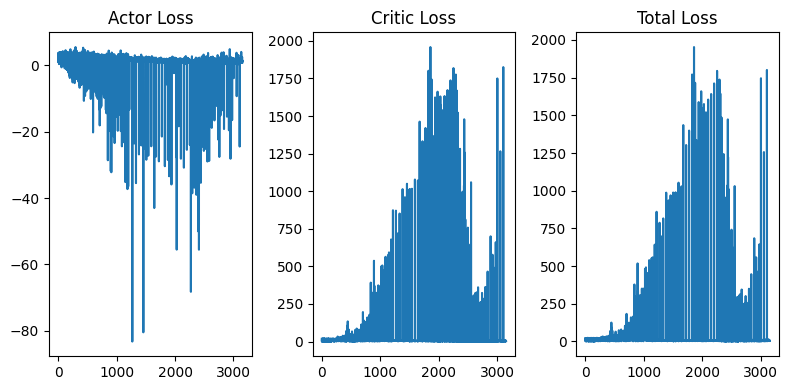

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(8, 4))

# Í∞Å subplotÏóê Îç∞Ïù¥ÌÑ∞ Í∑∏Î¶¨Í∏∞
axs[0].plot(np.array(actor_losses))
axs[0].set_title('Actor Loss')

axs[1].plot(np.array(critic_losses))
axs[1].set_title('Critic Loss')

axs[2].plot(np.array(total_losses))
axs[2].set_title('Total Loss')


# Í∑∏ÎûòÌîÑ ÌëúÏãú
plt.tight_layout()
plt.show()

### ÎßàÏßÄÎßâ ÏóêÌîºÏÜåÎìúÏùò Advantage Í∞í Í¥ÄÏ∏°

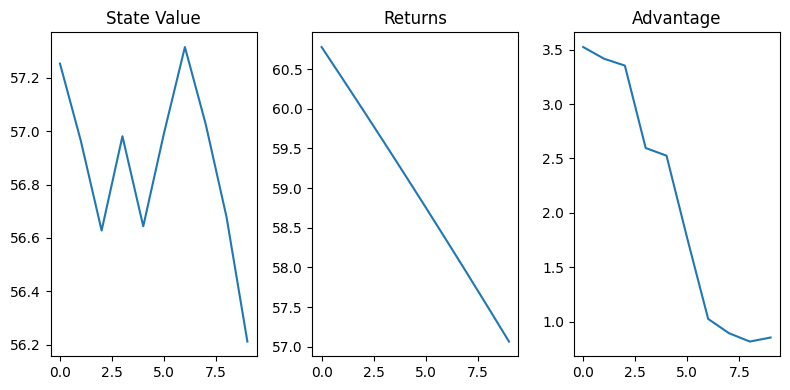

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(8, 4))

state_value = state_value.cpu().detach()
returns = returns.cpu().detach()
advantage = advantage.cpu().detach()

# Í∞Å subplotÏóê Îç∞Ïù¥ÌÑ∞ Í∑∏Î¶¨Í∏∞
axs[0].plot(np.array(state_value))
axs[0].set_title('State Value')

axs[1].plot(np.array(returns))
axs[1].set_title('Returns')

axs[2].plot(np.array(advantage))
axs[2].set_title('Advantage')


# Í∑∏ÎûòÌîÑ ÌëúÏãú
plt.tight_layout()
plt.show()

### Advantage Í∞íÏùò Ìñ•ÏÉÅÎ•† Í¥ÄÏ∏°

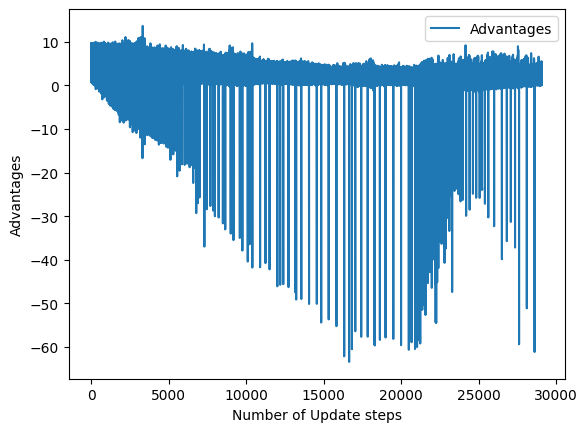

In [ ]:
plt.xlabel("Number of Update steps")
plt.ylabel("Advantages")
plt.plot(advantages, label='Advantages')
plt.legend()
plt.show()
plt.close()

### A2C ÏïåÍ≥†Î¶¨Ï¶òÏùò ÏÑ±Îä• Ìñ•ÏÉÅ

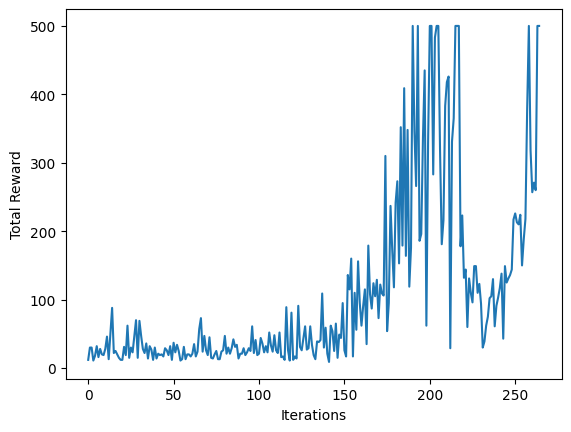

In [ ]:
plt.xlabel("Iterations")
plt.ylabel("Total Reward")
plt.plot(np.array(a2c_results_reward))
plt.savefig(f'./A2C performance.png')
np.save(f'./A2C_performance.npy', np.array(a2c_results_reward))

In [ ]:
import os
import pandas as pd
df = pd.DataFrame(np.array(a2c_results_reward))

df.to_csv('result.csv', index=True)

### REINFORCE ÏïåÍ≥†Î¶¨Ï¶òÍ≥º ÎπÑÍµê

Í∏∞Ï°¥ A2C ÏïåÍ≥†Î¶¨Ï¶òÍ≥ºÏùò Ï∞®Ïù¥Ï†ê


1.   EpisodeÏùò Ï†ÑÏ≤¥ stepÏùÑ ÌôúÏö©Ìï¥ÏÑú return Í≥ÑÏÇ∞

2.   Advantage Í∞íÏù¥ ÏïÑÎãå Return Í∞íÏùÑ ÌôúÏö©ÌïòÏó¨ ÏóÖÎç∞Ïù¥Ìä∏



In [ ]:
env_name = 'CartPole-v1'

env = gym.make(env_name)
obs_dim = env.observation_space.shape[0]
n_action = env.action_space.n

lr = 1e-3
gamma = 0.99
hidden_layers = [128, 128]

actor_critic = Actor_Critic(obs_dim, n_action).to(DEVICE)
optimizer = optim.Adam(actor_critic.parameters(), lr=lr)

In [ ]:
def reinf_update(net, done, current_state, current_action, next_states, rewards):

    # Trajectory Îã®ÏúÑÏùò Îç∞Ïù¥ÌÑ∞ Íµ¨ÏÑ±
    states = torch.tensor(current_state, dtype=torch.float).to(DEVICE)
    actions = torch.tensor(current_action, dtype=torch.int64).to(DEVICE)
    next_states = torch.tensor(next_states, dtype=torch.float).to(DEVICE)

    # Î∞òÌôò Í∞í Í≥ÑÏÇ∞
    returns = get_returns(net, next_states, rewards, done)

    # ÌòÑÏû¨ ÏÉÅÌÉúÏóê Îî∞Îùº ÌñâÎèô ÏÑ†ÌÉù
    logits, state_value = net.forward(states)
    logits = logits.view(-1, net.act_dim)
    log_prob = F.log_softmax(logits, dim=1)
    actions = actions.view(-1, 1)
    log_prob_act = log_prob.gather(1, actions)

    returns = torch.Tensor(returns).unsqueeze(1).to(DEVICE)

    ################################## ÏΩîÎìú ÏûëÏÑ± ###################################

    # Actor ÌñâÎèôÏùò Returns ÏµúÎåÄÌôî

    # CriticÏù¥ returnÌï®ÏàòÎ•º ÏòàÏ∏°ÌïòÎèÑÎ°ù ÌïôÏäµ

    ################################################################################

    loss = loss_policy + loss_critic

    return loss

In [ ]:
# ÏµúÎåÄ Episode ÌöüÏàò Í≤∞Ï†ï
max_epi_num = 1000

# ÏóêÌîºÏÜåÎìú ÎèôÏïà ÌöçÎìùÌïú reward Í∞í ÎπÑÍµê
reinf_results_reward = []
losses = []

for i in range(max_epi_num):

    done = False
    obs = env.reset()
    total_reward = 0

    current_state = []
    current_action = []
    next_states = []
    rewards = []


    while not done:
        # ÌñâÎèô Í≤∞Ï†ïÏùÑ ÌÜµÌï¥ ÌôòÍ≤ΩÍ≥º ÍµêÎ•ò
        action = action_decide(actor_critic, obs)
        next_obs, reward, done, info = env.step(action)
        total_reward += reward

        current_state.append(obs)
        current_action.append(action)
        next_states.append(next_obs)
        rewards.append(reward)

        if done:

            # Trajectory Îã®ÏúÑÏùò Îç∞Ïù¥ÌÑ∞ Íµ¨ÏÑ±
            states = torch.tensor(current_state, dtype=torch.float).to(DEVICE)
            actions = torch.tensor(current_action, dtype=torch.int64).to(DEVICE)
            next_states = torch.tensor(next_states, dtype=torch.float).to(DEVICE)

            # Î∞òÌôò Í∞í Í≥ÑÏÇ∞
            _, v_next = actor_critic.forward(next_states[-1])

            R = v_next * (1 - int(done))

            returns = []

            # rewardsÏùò Ïó≠ÏàúÎ∂ÄÌÑ∞ Î∞òÌôò Í∞í Í≥ÑÏÇ∞
            for reward in rewards[::-1]:
                R = reward + gamma * R
                returns.append(R)
            returns.reverse()

            # ÌòÑÏû¨ ÏÉÅÌÉúÏóê Îî∞Îùº ÌñâÎèô ÏÑ†ÌÉù
            logits, state_value = actor_critic.forward(states)
            logits = logits.view(-1, actor_critic.act_dim)
            log_prob = F.log_softmax(logits, dim=1)
            actions = actions.view(-1, 1)
            log_prob_act = log_prob.gather(1, actions)

            returns = torch.Tensor(returns).unsqueeze(1).to(DEVICE)

            ################################## ÏΩîÎìú ÏûëÏÑ± ###################################

            # Actor ÌñâÎèôÏùò Returns ÏµúÎåÄÌôî

            # CriticÏù¥ returnÌï®ÏàòÎ•º ÏòàÏ∏°ÌïòÎèÑÎ°ù ÌïôÏäµ

            ################################################################################

            loss = loss_policy + loss_critic

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            current_state = []
            current_action = []
            next_states = []
            rewards = []

        obs = next_obs

    if i % 100 == 0 and i != 0:
        print(f'epsiode: {i}, score: {np.mean(reinf_results_reward[-10:])}')
    reinf_results_reward.append(total_reward)

env.close()

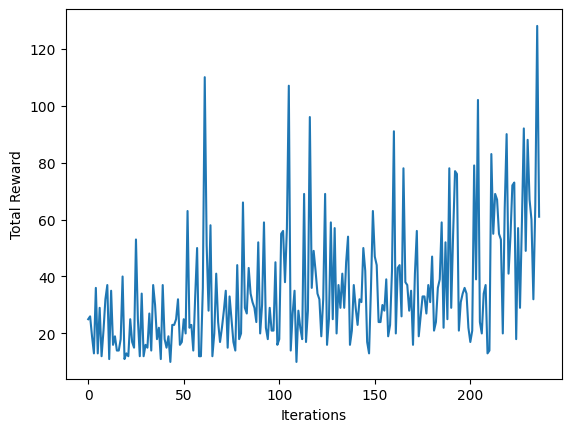

In [ ]:
plt.xlabel("Iterations")
plt.ylabel("Total Reward")
plt.plot(np.array(reinf_results_reward))
plt.savefig(f'./REINFORCE performance.png')
np.save(f'./REINFORCE_performance.npy', np.array(reinf_results_reward))

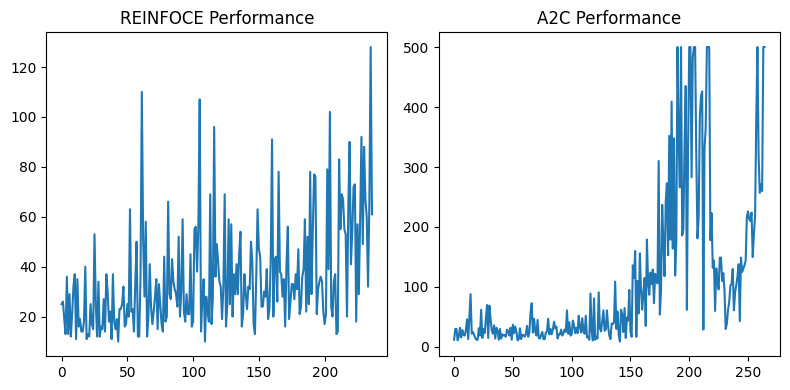

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Í∞Å subplotÏóê Îç∞Ïù¥ÌÑ∞ Í∑∏Î¶¨Í∏∞
axs[0].plot(np.array(reinf_results_reward))
axs[0].set_title('REINFOCE Performance')

axs[1].plot(np.array(a2c_results_reward))
axs[1].set_title('A2C Performance')

# Í∑∏ÎûòÌîÑ ÌëúÏãú
plt.tight_layout()
plt.show()